# Creation of the panels of Figure 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import scipy.ndimage as img
import scipy.signal as signal 
import scipy.stats as stat
from scipy.signal import fftconvolve
import matplotlib.patches as patch
from functools import partial
from astropy.stats import kuiper
from shapely.geometry import Polygon

In [2]:
import sys
import os
functions_folder = os.path.abspath('C:/Users/mmill/Documents/STAGE M1/Functions')
if functions_folder not in sys.path:
    sys.path.append(functions_folder)
from Detection_functions import MCDA, circular_mask, preprocessing

In [3]:
Static = np.load("Static_wave_example.npy")
Plane = np.load("Plane_wave_example.npy")
Radial = np.load("Radial_wave_example.npy")
Complex = np.load("Complex_wave_example.npy")

In [4]:
Nt, Nx, Ny = Static.shape
circle=[[145, 125],140]
pix_spacing=0.064  #mm/px
fs=110 #Hz
eps=17
MinPts=32
theta=.40
minimal_dist=10
sign_level=0.05
mask = circular_mask((Nx,Ny), center=circle[0], radius=circle[1])

In [5]:
Static_preprocessed = preprocessing(trial=Static, border_mask=mask, fs=fs, fc=30, threshold=99)
Plane_preprocessed = preprocessing(trial=Plane, border_mask=mask, fs=fs, fc=30, threshold=99)
Radial_preprocessed = preprocessing(trial=Radial, border_mask=mask, fs=fs, fc=30, threshold=99)
Complex_preprocessed = preprocessing(trial=Complex, border_mask=mask, fs=fs, fc=30, threshold=99)

In [6]:
Static_moving_clusters = MCDA(Trial=Static_preprocessed, Epsilon=eps, MinPts=MinPts, Theta=theta)
for i,mc in enumerate(Static_moving_clusters):
    print(f'Pattern n°{i}, Trace={mc['trace']}, length={len(mc['trace'])}')

Pattern n°0, Trace=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], length=16
Pattern n°1, Trace=[17, 18, 19, 20], length=4


In [7]:
Plane_moving_clusters = MCDA(Trial=Plane_preprocessed, Epsilon=eps, MinPts=MinPts, Theta=theta)
for i,mc in enumerate(Plane_moving_clusters):
    print(f'Pattern n°{i}, Trace={mc['trace']}, length={len(mc['trace'])}')

Pattern n°0, Trace=[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], length=13


In [8]:
Radial_moving_clusters = MCDA(Trial=Radial_preprocessed, Epsilon=eps, MinPts=MinPts, Theta=theta)
for i,mc in enumerate(Radial_moving_clusters):
    print(f'Pattern n°{i}, Trace={mc['trace']}, length={len(mc['trace'])}')

Pattern n°0, Trace=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], length=10
Pattern n°1, Trace=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], length=13
Pattern n°2, Trace=[22, 23, 24, 25], length=4
Pattern n°3, Trace=[26, 27, 28, 29, 30], length=5
Pattern n°4, Trace=[138, 139, 140, 141, 142, 143], length=6


In [53]:
Complex_moving_clusters = MCDA(Trial=Complex_preprocessed, Epsilon=15, MinPts=MinPts, Theta=theta)
for i,mc in enumerate(Complex_moving_clusters):
    print(f'Pattern n°{i}, Trace={mc['trace']}, length={len(mc['trace'])}')

Pattern n°0, Trace=[110, 111, 112, 113, 114, 115, 116], length=7
Pattern n°1, Trace=[124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136], length=13


## A: Visualisation of the wave patterns

In [10]:
Norm = colors.Normalize(vmax=1, vmin=-1)

### 1: Static pattern

In [11]:
Static_ind=0
Static_trace = Static_moving_clusters[Static_ind]['trace']
Static_start=7
Static_end=16

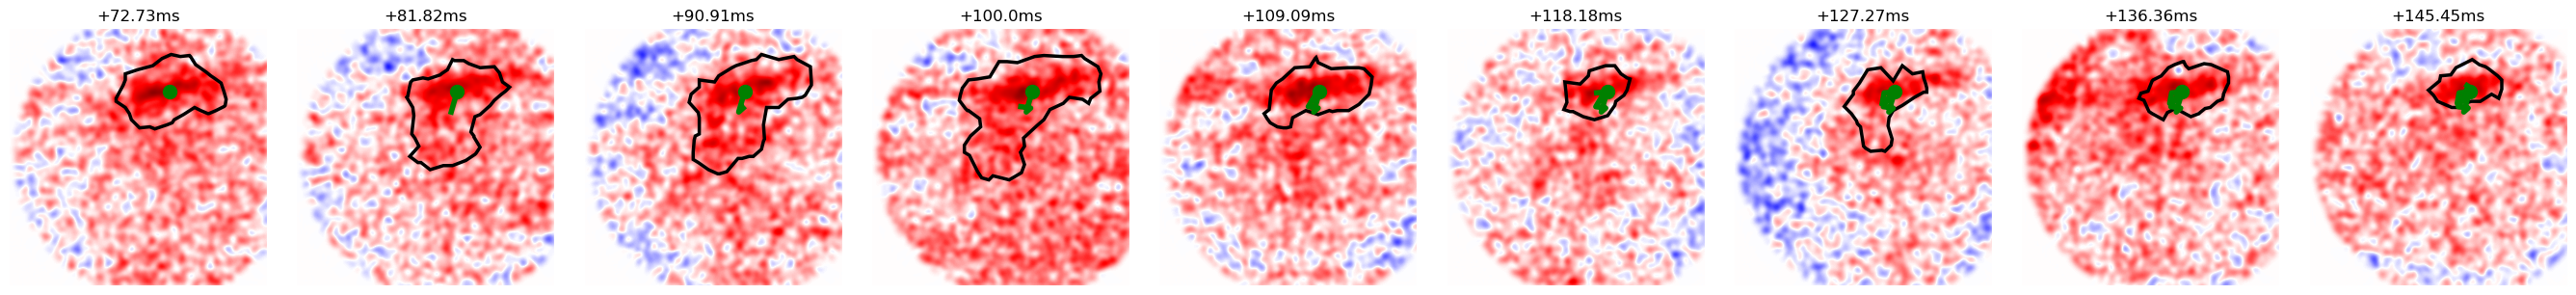

In [12]:
figA_static, axs = plt.subplots(1,len(Static_trace[Static_start:Static_end]), figsize=(len(Static_trace[Static_start:Static_end])*3,3),layout='tight')
Xc_st,Yc_st=[],[]
for index,frame_number in enumerate(Static_trace[Static_start:Static_end]):
    axs[index].set_title(f'+{np.round(frame_number/fs*1000,2)}ms')
    imag=axs[index].imshow(img.gaussian_filter(Static[frame_number]*mask, sigma=3, mode='constant'), cmap='seismic', norm=Norm)
    x, y = Static_moving_clusters[Static_ind]['alpha shapes'][frame_number-Static_trace[0]].exterior.xy
    mpl_poly = patch.Polygon(list(zip(y,x)), closed=True, edgecolor='k', facecolor='none', linewidth=2.5)
    axs[index].add_patch(mpl_poly)
    axs[index].axis('off')
    xc,yc=Static_moving_clusters[Static_ind]['alpha shapes'][frame_number-Static_trace[0]].centroid.xy
    Xc_st.append(xc.pop())
    Yc_st.append(yc.pop())
    axs[index].plot(Yc_st,Xc_st,'g',label='Centroid trajectory', linewidth=4)
    axs[index].plot(Yc_st[0], Xc_st[0], color='green', marker='o', label='Source', markersize=10)
plt.show()

### 2: Plane wave

In [13]:
Plane_ind=0
Plane_trace = Plane_moving_clusters[Plane_ind]['trace']
Plane_start=0
Plane_end=9

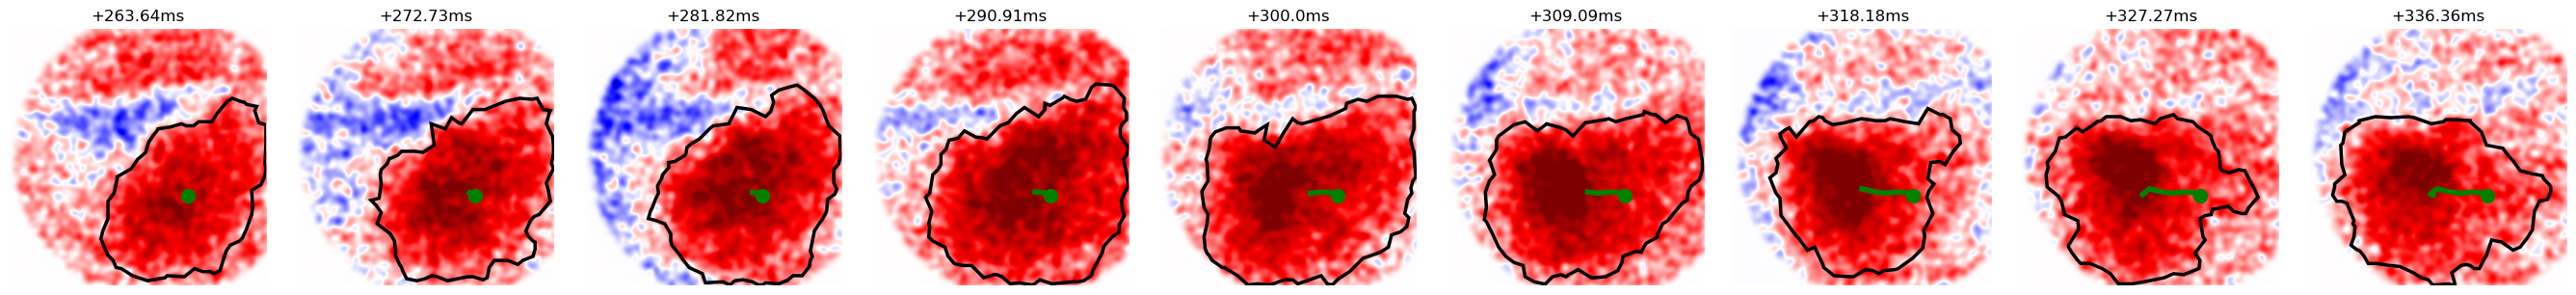

In [14]:
figA_plane, axs = plt.subplots(1,len(Plane_trace[Plane_start:Plane_end]), figsize=(len(Plane_trace[Plane_start:Plane_end])*3,3),layout='tight')
Xc_pl, Yc_pl=[], []
for index,frame_number in enumerate(Plane_trace[Plane_start:Plane_end]):
    axs[index].set_title(f'+{np.round(frame_number/fs*1000,2)}ms')
    axs[index].imshow(img.gaussian_filter(Plane[frame_number]*mask, sigma=3, mode='constant'), cmap='seismic', norm=Norm)
    x, y = Plane_moving_clusters[Plane_ind]['alpha shapes'][frame_number-Plane_trace[0]].exterior.xy
    mpl_poly = patch.Polygon(list(zip(y,x)), closed=True, edgecolor='k', facecolor='none', linewidth=2.5)
    axs[index].add_patch(mpl_poly)
    axs[index].axis('off')
    xc,yc=Plane_moving_clusters[Plane_ind]['alpha shapes'][frame_number-Plane_trace[0]].centroid.xy
    Xc_pl.append(xc.pop())
    Yc_pl.append(yc.pop())
    axs[index].plot(Yc_pl,Xc_pl,'g',label='Centroid trajectory', linewidth=4)
    axs[index].plot(Yc_pl[0], Xc_pl[0], color='green', marker='o', label='Source', markersize=10)
plt.show()

### 3: Radial wave

In [15]:
Radial_ind=4
Radial_trace = Radial_moving_clusters[Radial_ind]['trace']

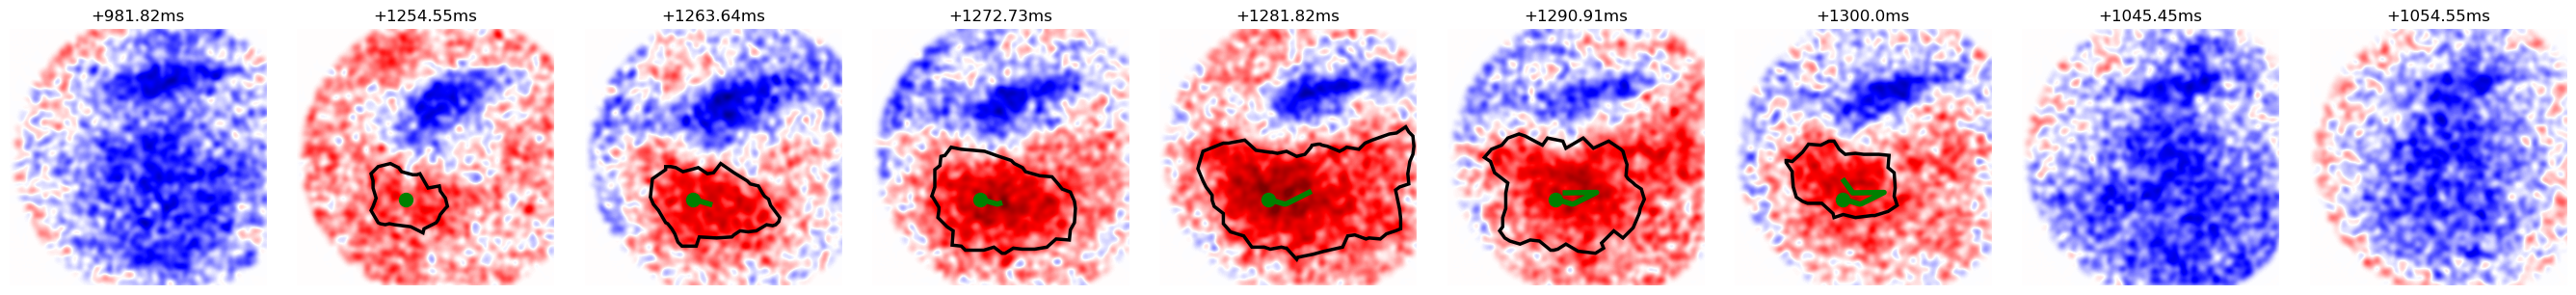

In [16]:
figA_radial, axs = plt.subplots(1,len(Radial_trace)+3, figsize=(9*3,3),layout='tight')
Xc_rd,Yc_rd=[],[]
for index,frame_number in enumerate([108]+Radial_trace+[115,116]):
    axs[index].set_title(f'+{np.round(frame_number/fs*1000,2)}ms')
    axs[index].imshow(img.gaussian_filter(Radial[frame_number]*mask, sigma=3, mode='constant'), cmap='seismic', norm=Norm)
    if frame_number in Radial_trace:
        x, y = Radial_moving_clusters[Radial_ind]['alpha shapes'][frame_number-Radial_trace[0]].exterior.xy
        mpl_poly = patch.Polygon(list(zip(y,x)), closed=True, edgecolor='k', facecolor='none', linewidth=2.5)
        axs[index].add_patch(mpl_poly)
        xc,yc=Radial_moving_clusters[Radial_ind]['alpha shapes'][frame_number-Radial_trace[0]].centroid.xy
        Xc_rd.append(xc.pop())
        Yc_rd.append(yc.pop())
        axs[index].plot(Yc_rd,Xc_rd,'g',label='Centroid trajectory', linewidth=4)
        axs[index].plot(Yc_rd[0], Xc_rd[0], color='green', marker='o', label='Source', markersize=10)
    axs[index].axis('off')
plt.show()

### 4: Complex wave

In [56]:
Complex_ind=1
Complex_trace = Complex_moving_clusters[Complex_ind]['trace']
Complex_start=2
Complex_end=11

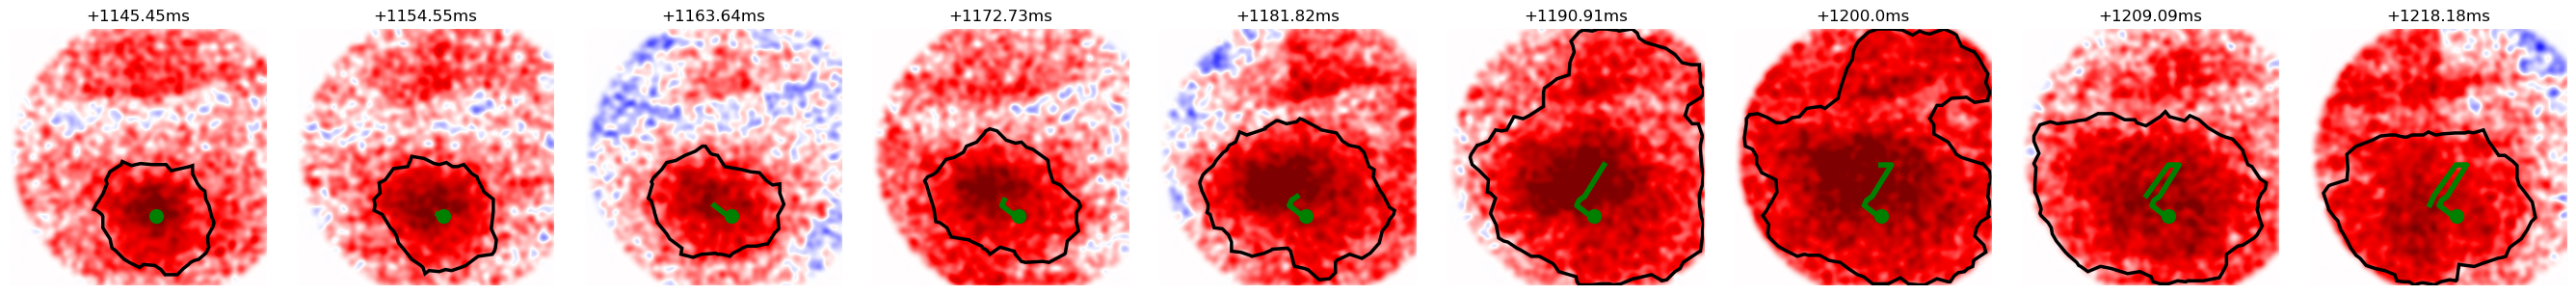

In [57]:
figA_complex, axs = plt.subplots(1,len(Complex_trace[Complex_start:Complex_end]), figsize=(len(Complex_trace[Complex_start:Complex_end])*3,3),layout='tight')
Xc_cx,Yc_cx=[],[]
for index,frame_number in enumerate(Complex_trace[Complex_start:Complex_end]):
    axs[index].set_title(f'+{np.round(frame_number/fs*1000,2)}ms')
    axs[index].imshow(img.gaussian_filter(Complex[frame_number]*mask, sigma=3, mode='constant'), cmap='seismic', norm=Norm)
    x, y = Complex_moving_clusters[Complex_ind]['alpha shapes'][frame_number-Complex_trace[0]].exterior.xy
    mpl_poly = patch.Polygon(list(zip(y,x)), closed=True, edgecolor='k', facecolor='none', linewidth=2.5)
    axs[index].add_patch(mpl_poly)
    xc,yc=Complex_moving_clusters[Complex_ind]['alpha shapes'][frame_number-Complex_trace[0]].centroid.xy
    Xc_cx.append(xc.pop())
    Yc_cx.append(yc.pop())
    axs[index].plot(Yc_cx,Xc_cx,'g',label='Centroid trajectory', linewidth=4)
    axs[index].plot(Yc_cx[0], Xc_cx[0], color='green', marker='o', label='Source', markersize=10)    
    axs[index].axis('off')
plt.show()

### Saving the sequences

In [70]:
savefigure = False

In [71]:
if savefigure:    
    figA_static.savefig('Static sequence')
    figA_plane.savefig('Plane sequence')
    figA_radial.savefig('Radial sequence')
    figA_complex.savefig('Complex sequence')

## C: Translation test

In [58]:
vx_st= np.append(np.diff(Xc_st),0)
vy_st = np.append(np.diff(Yc_st),0)

vx_pl= np.append(np.diff(Xc_pl),0)
vy_pl = np.append(np.diff(Yc_pl),0)

vx_rd= np.append(np.diff(Xc_rd),0)
vy_rd = np.append(np.diff(Yc_rd),0)

vx_cx= np.append(np.diff(Xc_cx),0)
vy_cx = np.append(np.diff(Yc_cx),0)

In [59]:
def pdf_cos_theta(y):
    # Probability density function of X = cos(Theta) if Theta follows a uniform law
    if abs(y)<1:
        return 1/(np.pi*np.sqrt(1 - y**2))
    else:
        return 0

In [60]:
def dp_pdf(N):
    # Probability density function of Y= mean( cos(Theta) ) if Theta follows a uniform law
    x = np.linspace(1-N, N-1, 100000)
    pdf_x = [pdf_cos_theta(y) for y in x]
    pdf_sum = pdf_x
    for _ in range(N-2):    # Compute the convolution of the pdf with itself N-2 times
        pdf_sum = fftconvolve(pdf_sum, pdf_x, mode='same')
        pdf_sum /= np.trapz(pdf_sum, x)  # Normalize the pdf after convolution
    pdf_sample_mean = (N-1)* pdf_sum # Scale the pdf to get the pdf of the sample mean
    scaled_x = x / (N-1)
    return scaled_x, pdf_sample_mean

In [61]:
def DPP(vx,vy):    
    velocities=np.vstack((vx[:-1],vy[:-1])).T
    dot_products = np.einsum('ij,ij->i', velocities[:-1], velocities[1:])#pairwise dot_products between consecutive velocity vectors
    norms = np.linalg.norm(velocities, axis=1)
    prod_norms=norms[:-1]*norms[1:] 
    directional_persistence = np.mean(dot_products/prod_norms)
    return directional_persistence

In [62]:
DA_st=DPP(vx_st, vy_st)
DA_pl=DPP(vx_pl, vy_pl)
DA_rd=DPP(vx_rd, vy_rd)
DA_cx=DPP(vx_cx, vy_cx)

In [63]:
absc_st, f_st = dp_pdf(len(vx_st))
absc_pl, f_pl = dp_pdf(len(vx_pl))
absc_rd, f_rd = dp_pdf(len(vx_rd))
absc_cx, f_cx = dp_pdf(len(vx_cx))

In [64]:
st_index=np.argmin((absc_st-DA_st)**2)
pl_index=np.argmin((absc_pl-DA_pl)**2)
rd_index=np.argmin((absc_rd-DA_rd)**2)
cx_index=np.argmin((absc_cx-DA_cx)**2)

In [65]:
cum_st=np.cumsum(f_st*(absc_st[1]-absc_st[0]))
cum_pl=np.cumsum(f_pl*(absc_pl[1]-absc_pl[0]))
cum_rd=np.cumsum(f_rd*(absc_rd[1]-absc_rd[0]))
cum_cx=np.cumsum(f_cx*(absc_cx[1]-absc_cx[0]))


In [66]:
st_lvl=np.argmin((cum_st-.95)**2)
pl_lvl=np.argmin((cum_pl-.95)**2)
rd_lvl=np.argmin((cum_rd-.95)**2)
cx_lvl=np.argmin((cum_cx-.95)**2)

Text(0, 0.5, 'Probability density')

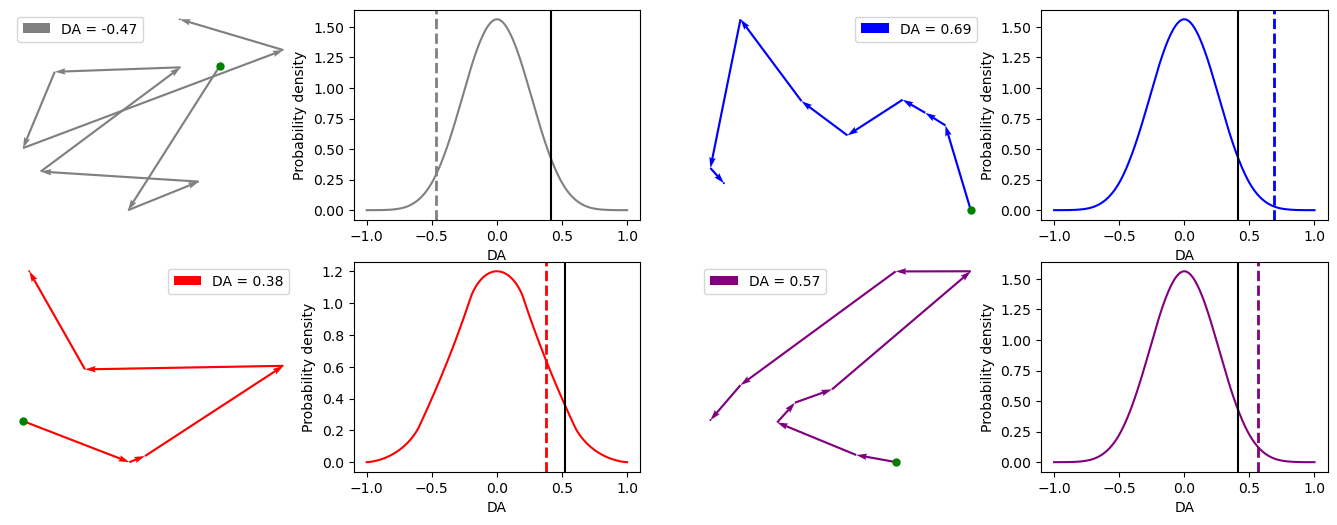

In [83]:
figC, axs = plt.subplots(2,4, figsize=(17,6))

axs[0,0].plot(Yc_st[0], Xc_st[0],'go', markersize=5)
axs[0,0].quiver(Yc_st, Xc_st, vy_st, vx_st, angles='xy', scale_units='xy', scale=1, color='gray', label=f'DA = {np.round(DA_st,2)}')
axs[0,0].invert_yaxis()
axs[0,0].axis('off')
axs[0,0].legend()

axs[0,1].plot(absc_st, f_st, c='gray')
axs[0,1].axvline(DA_st, label='observed DA', linestyle='--', c='gray', linewidth=2)
axs[0,1].axvline(absc_st[st_lvl], label='5% significance', c='k')
axs[0,1].set_xlabel('DA')
axs[0,1].set_ylabel('Probability density')



axs[0,2].plot(Yc_pl[0], Xc_pl[0],'go', markersize=5)
axs[0,2].quiver(Yc_pl, Xc_pl, vy_pl, vx_pl, angles='xy', scale_units='xy', scale=1, color='b', label=f'DA = {np.round(DA_pl,2)}')
axs[0,2].invert_yaxis()
axs[0,2].axis('off')
axs[0,2].legend()

axs[0,3].plot(absc_pl, f_pl, c='blue')
axs[0,3].axvline(DA_pl, label='observed DA', linestyle='--', c='blue', linewidth=2)
axs[0,3].axvline(absc_pl[pl_lvl], label='5% significance', c='k')
axs[0,3].set_xlabel('DA')
axs[0,3].set_ylabel('Probability density')



axs[1,0].plot(Yc_rd[0], Xc_rd[0],'go', markersize=5)
axs[1,0].quiver(Yc_rd, Xc_rd, vy_rd, vx_rd, angles='xy', scale_units='xy', scale=1, color='r', label=f'DA = {np.round(DA_rd,2)}')
axs[1,0].invert_yaxis()
axs[1,0].axis('off')
axs[1,0].legend()

axs[1,1].plot(absc_rd, f_rd, c='r')
axs[1,1].axvline(DA_rd, label='observed DA', linestyle='--', c='r', linewidth=2)
axs[1,1].axvline(absc_rd[rd_lvl], label='5% significance', c='k')
axs[1,1].set_xlabel('DA')
axs[1,1].set_ylabel('Probability density')




axs[1,2].plot(Yc_cx[0], Xc_cx[0],'go', markersize=5)
axs[1,2].quiver(Yc_cx, Xc_cx, vy_cx, vx_cx, angles='xy', scale_units='xy', scale=1, color='purple', label=f'DA = {np.round(DA_cx,2)}')
axs[1,2].invert_yaxis()
axs[1,2].axis('off')
axs[1,2].legend()


axs[1,3].plot(absc_cx, f_cx, c='purple')
axs[1,3].axvline(DA_cx, label='observed DA', linestyle='--', c='purple', linewidth=2)
axs[1,3].axvline(absc_cx[cx_lvl], label='5% significance', c='k')
axs[1,3].set_xlabel('DA')
axs[1,3].set_ylabel('Probability density')


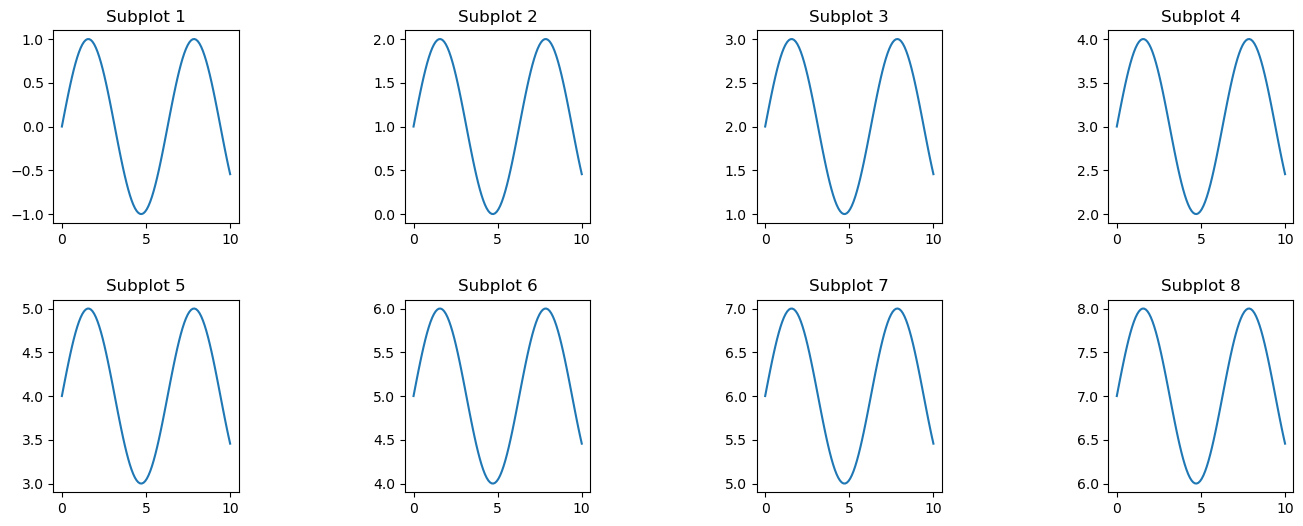

In [111]:

fig, axes = plt.subplots(2, 4, figsize=(16, 6))

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.9, hspace=0.4)

# Plot some data in each subplot
for i, ax in enumerate(axes.flat):
    ax.plot(x, y + i)
    ax.set_title(f'Subplot {i+1}')

# Show the figure
plt.show()


In [84]:
if False:
    figC.savefig('Translation test')

## D: Expansion test

In [85]:
cx_trace = Complex_trace[Complex_start:Complex_end]

In [94]:
St_surf=[sh.area*pix_spacing**2 for sh in Static_moving_clusters[Static_ind]['alpha shapes']]
Pl_surf=[sh.area*pix_spacing**2 for sh in Plane_moving_clusters[Plane_ind]['alpha shapes']]
Rd_surf=[sh.area*pix_spacing**2 for sh in Radial_moving_clusters[Radial_ind]['alpha shapes']]
Cx_surf=[sh.area*pix_spacing**2 for sh in Complex_moving_clusters[Complex_ind]['alpha shapes']]

In [93]:
Cx_surf

[15.747072,
 27.596799999999998,
 38.672384,
 39.262208,
 40.728576,
 52.690943999999995,
 80.6912,
 167.860224,
 168.85145599999998,
 121.7024,
 92.62489599999999,
 51.72224,
 38.592512]

In [86]:
cx_trace

[126, 127, 128, 129, 130, 131, 132, 133, 134]

In [ ]:
figD, axs= plt.subplots(2,4, figsize=(12,6))


axs[0,0].plot()

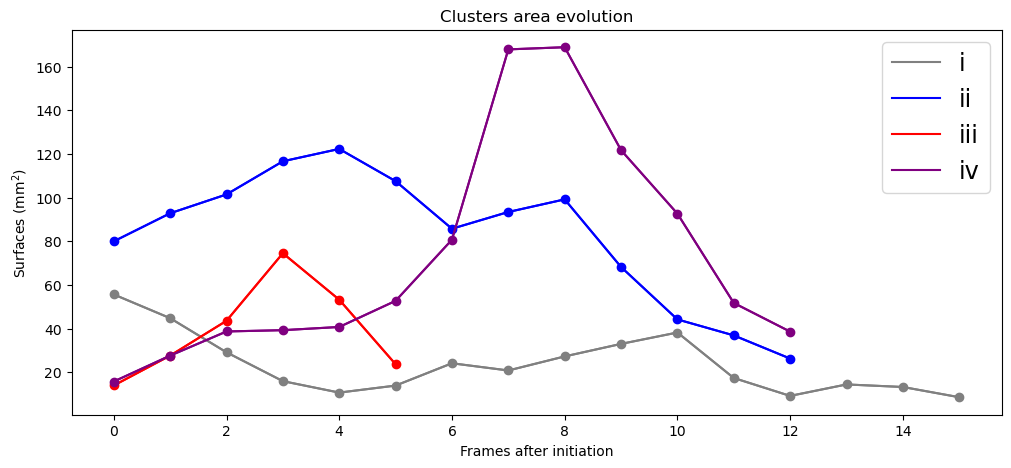

In [119]:
plt.figure(figsize=(12,5))
plt.title('Clusters area evolution')
plt.ylabel('Surfaces (mm$^2$)')
plt.xlabel('Frames after initiation')

plt.plot(St_surf, c='gray', label='i')
plt.plot(St_surf,c='gray',marker='o')

plt.plot(Pl_surf, c='blue', label='ii')
plt.plot(Pl_surf,c='blue',marker='o')

plt.plot(Rd_surf, c='r', label=r'iii')
plt.plot(Rd_surf,c='r',marker='o')

plt.plot(Cx_surf, c='purple', label='iv')
plt.plot(Cx_surf,c='purple',marker='o')

plt.legend(fontsize='xx-large')
plt.savefig('Expansion test')
